In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import seaborn as sns

In [11]:
# load dataset
data = pd.read_csv('consumo de energia.csv',sep =';')

# organizando e limpando dataframe 
data = data.T.reset_index(drop=True)
data.columns = data.iloc[0,:].map(lambda x: x.split('/')[0])
data = data[1:]
data = data.map((lambda x: float(x.replace(',','.'))))

In [12]:
def tarifa_normal(df):
    base = 0.594
    tarifa_normal = np.round(np.sum(df*base),2)
    return tarifa_normal


def tarifa_branca(df):
    tar_fora_de_ponta =0.499
    tar_intermediaria = 0.724
    tar_ponta = 1.115

    a = np.sum(df[0:16]*tar_fora_de_ponta)
    b = np.sum(df[17:18]*tar_intermediaria)
    c = np.sum(df[18:20]* tar_ponta)
    d = np.sum(df[20:21]*tar_intermediaria)
    e = np.sum(df[21:23]*tar_fora_de_ponta)
    soma = np.round(np.sum(a+b+c+d+e),2)

    return soma


def tarifa_c_final_semana(df):
    fora_de_ponta =0.499

    fds = [5, 6, 12, 13, 19, 20, 26, 27]
    if int(df.name) in fds:
        tarifa = np.round(np.sum(df* fora_de_ponta ),2)
        return tarifa
    
    else: return tarifa_branca(df)
        

In [65]:
base = 0.594
tar_fora_de_ponta =0.499
tar_intermediaria = 0.724
tar_ponta = 1.115

lista_tarifa_branca = []
lista_tarifa_normal = []
days = []

for day in data.columns:
    aux = data[day]
    custo_tarifa_normal = tarifa_normal(aux)
    custo_tarifa_branca = tarifa_c_final_semana(aux)

    lista_tarifa_branca.append(custo_tarifa_branca)
    lista_tarifa_normal.append(custo_tarifa_normal)
    days.append(int(day))


df_calculo = pd.DataFrame({'Dia': days,
                            'tn': lista_tarifa_normal,
                            'tb': lista_tarifa_branca,
                            'acm_tn': np.cumsum(lista_tarifa_normal),
                            'acm_tb': np.cumsum(lista_tarifa_branca)})
df_calculo.set_index('Dia')

df_soma = pd.DataFrame({'op': ['soma'],
                        'Tarifa Normal': np.sum(lista_tarifa_normal),
                        'Tarifa Branca': np.sum(lista_tarifa_branca)})

df_calculo['pct_economia'] = np.round((((df_calculo['acm_tn']-df_calculo['acm_tb'])/df_calculo['acm_tb'][30]))*100,2)
df_calculo['economia_dia'] = np.round(((df_calculo['acm_tn']/df_calculo['acm_tb'])-1)*100,2)

pct = np.round(((df_soma['Tarifa Normal'][0]/ df_soma['Tarifa Branca'][0])-1)*100,2)
ganho = df_soma['Tarifa Normal'][0] - df_soma['Tarifa Branca'][0]

print(f"""Custo Tarifa Normal: {df_soma['Tarifa Normal'][0]:.2f} 
Custo Tarifa Branca: {df_soma['Tarifa Branca'][0]:.2f}\n
Porcentagem de economia de {pct}""")

df_calculo

Custo Tarifa Normal: 917.08 
Custo Tarifa Branca: 839.09

Porcentagem de economia de 9.29


,Dia,tn,tb,acm_tn,acm_tb,pct_economia,economia_dia
0,1,32.93,29.88,32.93,29.88,0.36,10.21
1,2,32.57,29.10,65.50,58.98,0.78,11.05
2,3,35.47,33.11,100.97,92.09,1.06,9.64
3,4,36.78,33.45,137.75,125.54,1.46,9.73
4,5,15.49,13.01,153.24,138.55,1.75,10.60
5,6,14.69,12.34,167.93,150.89,2.03,11.29
6,7,33.76,30.51,201.69,181.40,2.42,11.19
7,8,35.71,33.63,237.40,215.03,2.67,10.40
8,9,33.02,29.78,270.42,244.81,3.05,10.46
9,10,32.15,30.91,302.57,275.72,3.20,9.74


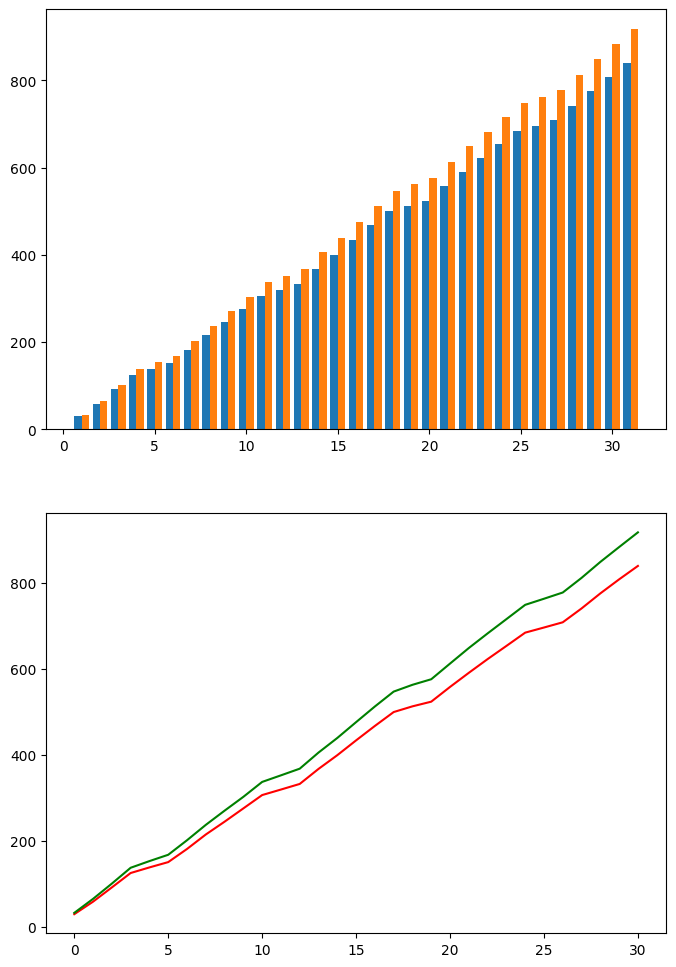

In [14]:
# Criando uma figura vazia e eixo 
fig, ax = plt.subplots(2,1,figsize = (8,12))

#  vetor para cada elemento 
x = np.array(range(1,df_calculo.shape[0]+1))

width_bar = 0.40

ax[0].bar(x-width_bar/2 , df_calculo['acm_tb'], width_bar)
ax[0].bar(x+width_bar/2 , df_calculo['acm_tn'], width_bar)


ax[1].plot(df_calculo.index, df_calculo['acm_tb'],color = 'red')
ax[1].plot(df_calculo.index, df_calculo['acm_tn'], color = 'green')



#  Criação do PDF

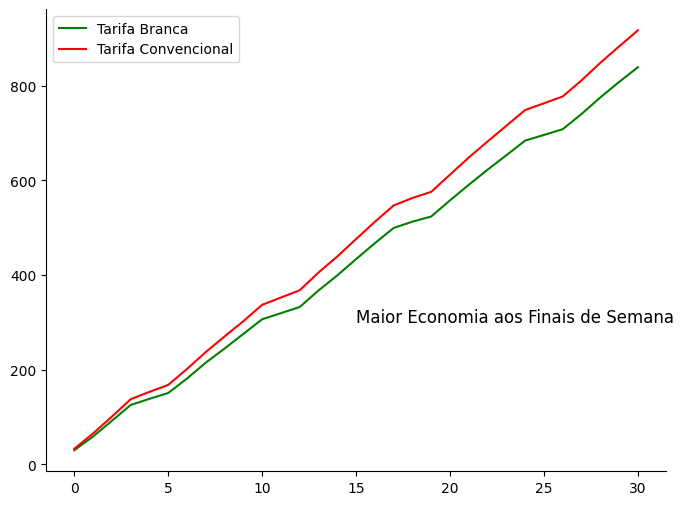

In [15]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(df_calculo.index, df_calculo['acm_tb'],color = 'green', label = 'Tarifa Branca')
ax.plot(df_calculo.index, df_calculo['acm_tn'], color = 'red', label = 'Tarifa Convencional')
plt.text(15, 300, "Maior Economia aos Finais de Semana", fontsize=12, color='black')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()



In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages



# Criando um arquivo PDF
with PdfPages('graficos_analises.pdf') as pdf:
     
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.text(0.5, 0.9, "Análise de Tarifas de Energia", ha='center', fontsize=16, weight='bold', color='darkblue')
    ax.text(0.5, 0.75, "Tarifa Branca: RS 839,09  |  Tarifa Convencional: RS 917,08", 
            ha='center', fontsize=12, color='#787878')
    ax.text(0.5, 0.65, f"Economia: {pct}% ao mês com Tarifa Branca", ha='center', fontsize=12, color='green')

    # Conclusão e Recomendações
    ax.text(0.1, 0.5, "Conclusão:", fontsize=12, weight='bold', color='black')
    ax.text(0.1, 0.45, "- Tarifa Branca é mais econômica.", fontsize=10)
    ax.text(0.1, 0.4, "- Sugerido uso de IoT para automação e controle do consumo.", fontsize=10)
    ax.axis('off')
    pdf.savefig(fig)
    plt.close()


    fig, ax = plt.subplots(figsize = (8,6))

    ax.plot(df_calculo.index, df_calculo['acm_tb'],color = 'green', label = 'Tarifa Branca')
    ax.plot(df_calculo.index, df_calculo['acm_tn'], color = 'red', label = 'Tarifa Convencional')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.text(15, 300, "Maior Economia aos Finais de Semana", fontsize=12, color='black')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Adicionando rodapé
    plt.figtext(0.5, 0.01, " Novembro 2024", ha='center', fontsize=10, color='gray')
    
    pdf.savefig()
    plt.close()